### Data Understanding 
The data contains 12 features which characterize the netflix content. The data has 8807 rows and 12 columns. We are supposed to use the features to analyze the data and come up with visualizations which best summarize our Netlix data content.

### Experimental Design
Import necessary libraries

Import dataset

Exploring data

Data cleaning

1. Checking & handling missing values
2. Checking for outliers
3. Changing data types

EDA

1. What is the comparison between the data types? / Understanding the content available.
2. Plotting the Tv shows & Movies vs ratings
3. Trend of the movies & Tv shows ratings in the past 10 years.
4. Number of Tv Shows & Movies released in the last 10 years.
5. Top 10 countries producing content
6. Top 5 Durations for the Content
7. Sentiment Analysis of Netflix content

### Data Relevance
We check for data relevance by checking the percentage of missing values in the columns. If the percentage of missing values is greater than 30 %, we drop the column since it would already be missing quite a bit of information which would not be helpful in our data analysis. With our netflix data, none of the columns had missing values that were greater than 30 %, so we can say that our data is relevant. 


### Importing the libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from textblob import TextBlob # for sentiment analysis

### Loading the dataset

In [57]:
df = pd.read_csv("C:\\Users\\Wangari Kimani\\Documents\\MSc DSA\\FCC\\PRACTICE\\Netflix Data\\Netflix data.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Exploring the data

In [58]:
# Checking the descriptive statistics of the data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [59]:
# Checking the number of rows and columns in the data
df.shape

(8807, 12)

In [60]:
# Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


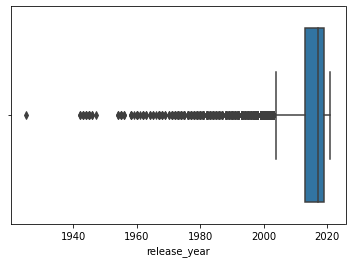

In [62]:
# Checking for outliers in the release year column
sns.boxplot(data = df, x = 'release_year');

#### There seems to be outliers in the release year column from years that fall below 2005.

In [63]:
# Checking the rows with release years which fall below 2005
df.loc[df['release_year'] < 2005]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,21-Sep-21,1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,21-Sep-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
26,s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",NaN,21-Sep-21,1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,16-Sep-21,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...
...,...,...,...,...,...,...,...,...,...,...,...,...
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,01-Jan-20,1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...
8766,s8767,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,01-Jan-19,2002,PG-13,124 min,"Action & Adventure, Sports Movies",A notorious underground rush-seeker deemed unt...
8768,s8769,Movie,Y Tu MamÃ¡ TambiÃ©n,Alfonso CuarÃ³n,"Maribel VerdÃº, Gael GarcÃ­a Bernal, Diego Lun...",Mexico,01-Jun-17,2001,R,106 min,"Dramas, Independent Movies, International Movies",When rich teens Tenoch and Julio meet the allu...
8770,s8771,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,01-Mar-18,2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...


#### We have about 783 rows with release years that fall below 2005.

### Cleaning the data

#### Task 1. Handling missing values & Outliers


In [17]:
# Getting the percentage of missing data
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df)*100
    if null_rate > 0:
        print('{} null rate: {}%'. format(i,round(null_rate,2)))


director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [18]:
## Dealing with the missing data
df.head()
df['country'] = df['country'].fillna(df['country']. mode()[0])
#df['country'].isnull().any() check whether the null values in country have been filled.
df
df['director'] = df['director'].replace(np.nan, 'No data')
df['cast'] = df['cast'].replace(np.nan,'No data')
df.dropna()
df.drop_duplicates()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No data,No data,United States,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No data,No data,United States,01-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,01-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [19]:
# Checking the mode for rating column
df['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [20]:
## Replacing the outliers in the rating column with the mode
df['rating'] = df['rating'].replace('66 min' , 'TV-MA')
df['rating'] = df['rating'].replace('74 min' , 'TV-MA')
df['rating'] = df['rating'].replace('84 min' , 'TV-MA')

In [21]:
## Dropping the na values from the other columns
df.dropna(subset=["date_added","rating", "duration"], inplace=True)

In [22]:
## Confirming all the missing values have been handled.
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

#### Task 2. Changing Date Added type


In [23]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

#### Task 3 Creating Additional Columns

In [24]:
df['month_added'] = df['date_added'].dt.month # creating a month added column
df['month_name_added'] = df['date_added'].dt.month_name() # creating a month added name column
df['year_added'] = df['date_added'].dt.year # creating a year added column
#df.head()

In [25]:
df.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
month_added                  int64
month_name_added            object
year_added                   int64
dtype: object

In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No data,No data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


### Task 4 Converting Data Types of the new columns to numeric from float

In [27]:
df['year_added'] = pd.to_numeric(df['year_added'])
df['month_added'] = pd.to_numeric(df['month_added'])

In [28]:
df.groupby('type').count()['release_year']

type
Movie      6126
TV Show    2664
Name: release_year, dtype: int64

In [29]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No data,No data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


In [30]:
# Confirming the columns are in the correct data types
df.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
month_added                  int64
month_name_added            object
year_added                   int64
dtype: object

### Analyzing & Visualizing the Data

#### Qst 1. What is the comparison between the data types? / Understanding the content available.

In [31]:
# Creating a dataframe that shows the total for the content type
data_types = df['type'].value_counts()
print(data_types)

Movie      6126
TV Show    2664
Name: type, dtype: int64


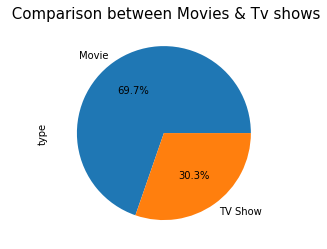

In [32]:
# Plotting a pie chart for the content types
data_types.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title(' Comparison between Movies & Tv shows', fontsize = 15 );

### Qst2. Tv Shows & Movies Ratings

In [33]:
# Create a dataframe that groups the content according to their ratings
df_ratings = df.groupby('rating')['type'].value_counts()
print(df_ratings)


rating    type   
G         Movie        41
NC-17     Movie         3
NR        Movie        75
          TV Show       4
PG        Movie       287
PG-13     Movie       490
R         Movie       797
          TV Show       2
TV-14     Movie      1427
          TV Show     730
TV-G      Movie       126
          TV Show      94
TV-MA     Movie      2062
          TV Show    1143
TV-PG     Movie       540
          TV Show     321
TV-Y      TV Show     175
          Movie       131
TV-Y7     TV Show     194
          Movie       139
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         3
Name: type, dtype: int64


In [34]:
# Creating a dataframe that has the ratings for movies & Tv Shows separatley
df_rg = pd.crosstab(df['rating'],df['type'])
df_rg

type,Movie,TV Show
rating,,
G,41,0
NC-17,3,0
NR,75,4
PG,287,0
PG-13,490,0
R,797,2
TV-14,1427,730
TV-G,126,94
TV-MA,2062,1143


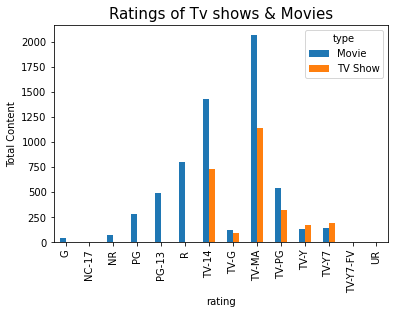

In [35]:
## Plotting the Tv shows & Movies vs ratings
df_rg = pd.crosstab(df['rating'],df['type'])
df_rg.plot(kind='bar',ylabel="Total Content")
plt.title('Ratings of Tv shows & Movies', fontsize = 15)
plt.show()

### Qst3. Trend of the movies & Tv shows ratings in the past 10 years.

In [36]:
#Filtering the release years after 2010( the last 10 years)
df3 = df[df['release_year'] > 2010] 

In [37]:
# Grouping the content with their respective ratings over the past 10 years.
df3.groupby(['release_year','type'])['rating'].value_counts()

release_year  type     rating
2011          Movie    TV-14     37
                       PG-13     23
                       R         20
                       TV-MA     20
                       PG        18
                                 ..
2021          TV Show  TV-14     78
                       TV-PG     25
                       TV-Y      20
                       TV-Y7     20
                       TV-G      12
Name: rating, Length: 191, dtype: int64

In [38]:
# Checking the first 5 rows of our new dataframe
df3.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No data,No data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


In [39]:
# Creating a pivot table containing the trend of movies and tv shows in the past 10 years
df_trend=pd.pivot_table(df3,values='rating',index='release_year',columns='type',aggfunc='count')


In [40]:
df_trend

type,Movie,TV Show
release_year,,
2011,145,40
2012,173,63
2013,225,61
2014,264,88
2015,396,159
2016,658,243
2017,765,265
2018,767,379
2019,633,397


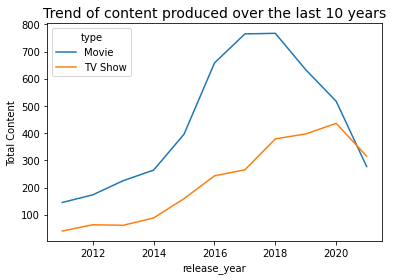

In [41]:
## Plotting a line graph of the trend of content produced over the past 10 years 
df_trend.plot(kind='line', ylabel ="Total Content")
plt.title('Trend of content produced over the last 10 years', fontsize = 14)
plt.show()

### Qst4. Number of Tv Shows & Movies released in the last 10 years.

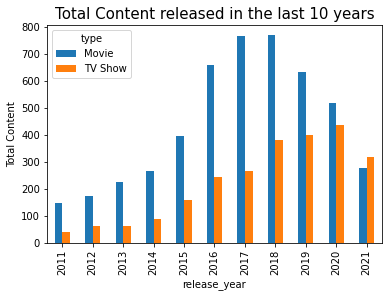

In [42]:
## Plotting the number of Tv Shows & Movies released in the last 10 years.
df_trend = pd.crosstab(df3['release_year'],df3['type'])
df_trend.plot(kind='bar', ylabel="Total Content")
plt.title("Total Content released in the last 10 years",fontsize=15)
plt.show()

### Qst5. Top 10 countries producing content

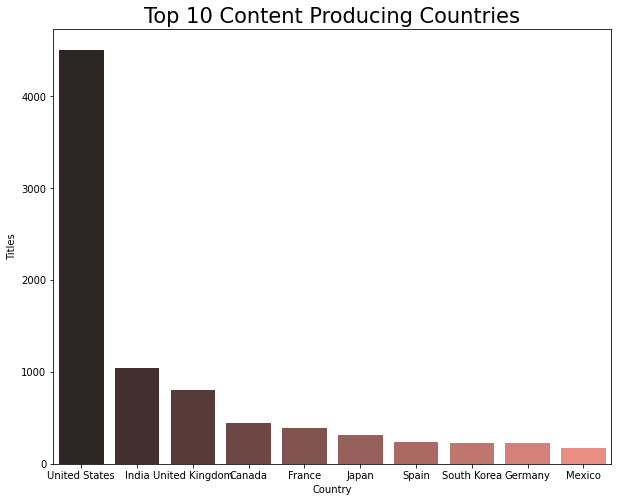

In [43]:
# Plotting the top 10 countries producing content according to the titles 
Countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
Countries = Countries[Countries != 'country unavailable']
plt.figure(figsize=(10,8))
g = sns.countplot(x = Countries, order=Countries.value_counts().index[:10], palette='dark:salmon')
plt.title('Top 10 Content Producing Countries', fontsize=21)
plt.xlabel('Country')
plt.ylabel('Titles')
plt.show()

### Qst6. Top Durations for the Content

In [47]:
df['duration']

<bound method Series.sort_values of 0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8790, dtype: object>

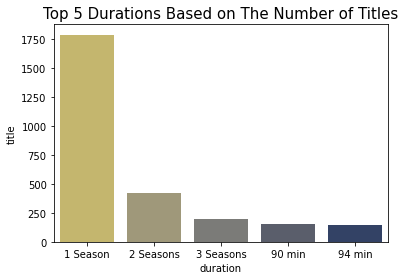

In [50]:
# Plotting the top 5 durations based on the number of titles 
plt.figure
netflix_duration = df['duration'].value_counts().reset_index()
netflix_duration = pd.DataFrame(netflix_duration)
netflix_duration.columns = ['duration','title']
sns.barplot(x = 'duration',y = 'title', data=netflix_duration.head(5), palette="cividis_r")
plt.title('Top 5 Durations Based on The Number of Titles', fontsize=15);

### Qst7. Sentiment Analysis

In [46]:
dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title = "Sentiment of content on Netflix")
fig4.show()